<a href="https://colab.research.google.com/github/SushilKokare/University_Project/blob/Keras_Applications/KA_37_ConvNeXtLarge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications import ConvNeXtLarge
from matplotlib import pyplot as plt

In [5]:
def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()

In [6]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape
     

In [7]:

pathTrain  = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'

pathTest ='/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'
  

In [8]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)
    

Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [10]:
base_model = ConvNeXtLarge(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)
 

785596384/785596384 [==============================] - 35s 0us/step


In [11]:
for layer in base_model.layers:
  layer.trainable = False


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
71/71 [==============================] - 669s 9s/step - loss: 3.0686 - accuracy: 0.7348 - val_loss: 0.8299 - val_accuracy: 0.7520
Epoch 2/10
71/71 [==============================] - 82s 1s/step - loss: 0.3602 - accuracy: 0.8912 - val_loss: 1.2005 - val_accuracy: 0.7560
Epoch 3/10
71/71 [==============================] - 82s 1s/step - loss: 0.3428 - accuracy: 0.9027 - val_loss: 1.5961 - val_accuracy: 0.6960
Epoch 4/10
71/71 [==============================] - 82s 1s/step - loss: 0.3101 - accuracy: 0.9205 - val_loss: 1.4416 - val_accuracy: 0.7040
Epoch 5/10
71/71 [==============================] - 82s 1s/step - loss: 0.0359 - accuracy: 0.9862 - val_loss: 1.1717 - val_accuracy: 0.7240
Epoch 6/10
71/71 [==============================] - 82s 1s/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.8806 - val_accuracy: 0.7720
Epoch 7/10
71/71 [==============================] - 82s 1s/step - loss: 0.0062 - accuracy: 0.9991 - val_loss: 0.8931 - val_accuracy: 0.7800
Epoch 8/10
71/71 [=

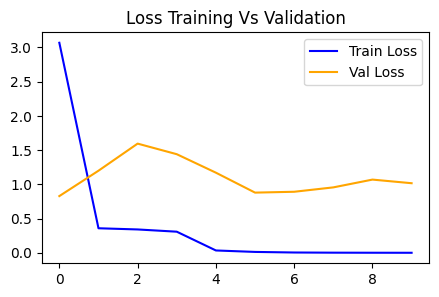

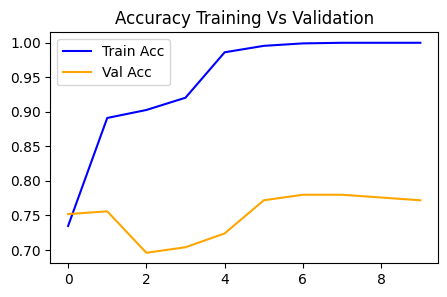

In [12]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

show_result(history)

In [13]:
import pandas as pd

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.068571,0.734785,0.829948,0.752
1,0.360177,0.891159,1.200463,0.756
2,0.342787,0.902710,1.596101,0.696
3,0.310094,0.920480,1.441605,0.704
4,0.035947,0.986228,1.171700,0.724
5,0.014717,0.995558,0.880605,0.772
6,0.006245,0.999112,0.893146,0.780
7,0.003733,1.000000,0.957095,0.780
8,0.002758,1.000000,1.070836,0.776
9,0.002198,1.000000,1.017913,0.772
